In [20]:
from typing import List,TypedDict
from langgraph.graph import StateGraph, START,END

In [21]:
class AgentState(TypedDict):
    number1: int
    number2: int
    operation1 : str
    operation2 : str
    number3: int
    number4: int
    result1: int
    result2: int

In [22]:
def adder_node1(state: AgentState) -> AgentState:
    state['result1'] = state['number1'] + state['number2']
    return state
def adder_node2(state: AgentState) -> AgentState:
    state['result2'] = state['number3'] + state['number4']
    return state
def subtractor_node1(state: AgentState) -> AgentState:
    state['result1'] = state['number1'] - state['number2']
    return state
def subtractor_node2(state: AgentState) -> AgentState:
    state['result2'] = state['number3'] - state['number4']
    return state

def decide_next_node1(state: AgentState) -> str:
    if state['operation1'] == '+':
        return 'addition_operation1'
    elif state['operation1'] == '-':
        return 'subtraction_operation1'

def decide_next_node2(state: AgentState) -> str:
    if state['operation2'] == '+':
        return 'addition_operation2'
    elif state['operation2'] == '-':
        return 'subtraction_operation2'

In [33]:
graph = StateGraph(AgentState)

graph.add_node("add_node",adder_node1)
graph.add_node("subtract_node",subtractor_node1)
graph.add_node("router",lambda state:state)

graph.add_edge(START, "router")
graph.add_conditional_edges("router",decide_next_node1,
    {
        "addition_operation": "add_node",
        "subtraction_operation": "subtract_node"
    })

graph.add_node("add_node1",adder_node2)
graph.add_node("subtract_node1",subtractor_node2)
graph.add_node("router1",lambda state:state)

graph.add_edge("add_node", "router1")
graph.add_edge("subtract_node", "router1")

graph.add_conditional_edges("router1",decide_next_node2,
    {
        "addition_operation1": "add_node1",
        "subtraction_operation1": "subtract_node1"
    })

graph.add_edge("add_node1", END)
graph.add_edge("subtract_node1", END)

app = graph.compile()

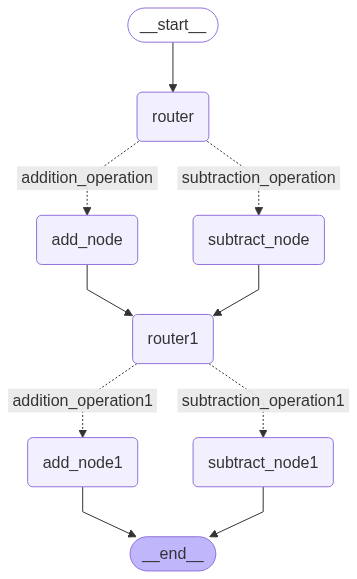

In [34]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))